In [3]:
# imports
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# TODO save everying as pdf instead of png
from matplotlib.scale import LogScale

In [7]:
sns.color_palette("hls", 8)
sns.set_theme(style="whitegrid")
sns.color_palette("hls", 8)
figsize = (11.2, 4.8)
singlechart_figsize=(8,8)
twocolumn_figsize=(10.8, 7.2)
wholecolumn_figsize=(14.4, 3.2)

SAVE_DIR = "./paper_figures/"
THROUGHPUT_YLABEL = "Throughput(tasks/second)"

def change_font(axes, title, fontsize):
    for tick in axes.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize-5)

    for tick in axes.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize-5)

    xlabel = axes.xaxis.get_label()
    ylabel = axes.yaxis.get_label()

    xlabel.set_fontsize(fontsize)
    ylabel.set_fontsize(fontsize)
    if not title is None:
        axes.set_title(title, fontsize=fontsize)
    # axes.legend(prop=dict(size=fontsize))

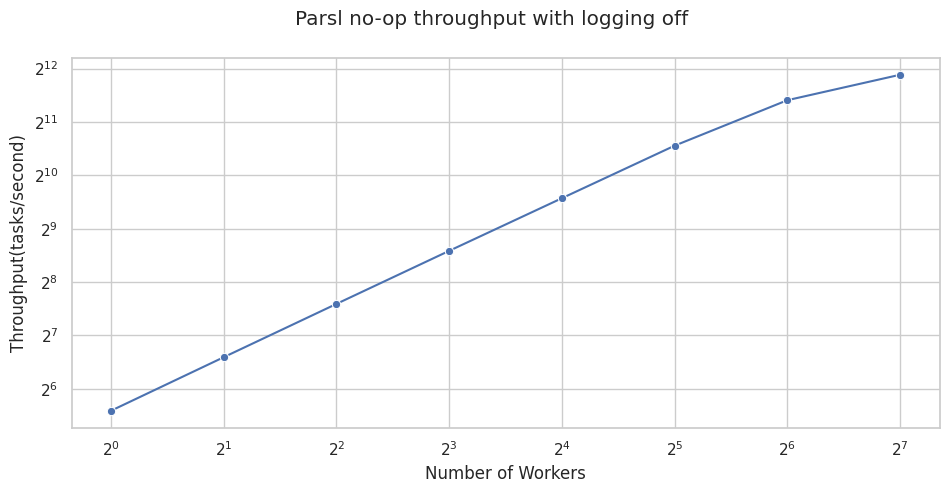

In [9]:
# no logging throughput 
f, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
runtime = [2082.822674036026, 1038.7380170822144, 519.6603798866272, 260.74488377571106, 131.58347415924072, 66.48571419715881, 36.817787170410156, 26.448672771453857]
throughput = [100000 / t for t in runtime]
nworkers=[1, 2, 4, 8, 16, 32, 64, 128]
df = pd.DataFrame({THROUGHPUT_YLABEL: throughput, "Number of Workers": nworkers})
sns.lineplot(df, x="Number of Workers", y=THROUGHPUT_YLABEL, marker="o")
ax.set_xscale(LogScale(1, base=2))
ax.set_yscale(LogScale(2, base=2))
f.suptitle("Parsl no-op throughput with logging off")
f.savefig(SAVE_DIR + "parsl_throughput_nologging.png")

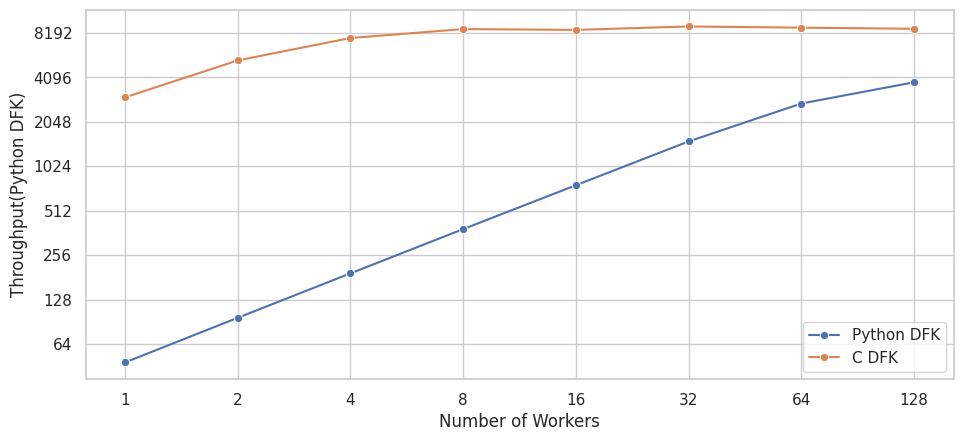

In [10]:
# no logging cdfk throughput
f, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
cruntime = [33.46020517349243,18.812900447845458,13.267690026760102,11.541702806949615,11.690159857273102,11.076891493797302,11.291940593719483,11.48463146686554]
hruntime = [2082.822674036026, 1038.7380170822144, 519.6603798866272, 260.74488377571106, 131.58347415924072, 66.48571419715881, 36.817787170410156, 26.448672771453857]
nworkers = [1,2,4,8,16,32,64,128]
cthroughput = [100000 / n for n in cruntime]
hthroughput = [100000 / n for n in hruntime]
df = pd.DataFrame({"Throughput(Python DFK)": hthroughput, "Throughput(C DFK)": cthroughput, "Number of Workers": nworkers})
sns.lineplot(df, x="Number of Workers", y="Throughput(Python DFK)", marker="o", label="Python DFK", ax=ax)
sns.lineplot(df, x="Number of Workers", y="Throughput(C DFK)", marker="o", label="C DFK", ax=ax)
ax.set_xscale(LogScale(1, base=2))
ax.set_yscale(LogScale(2, base=2))
ax.set_xticks(nworkers)
ax.set_yticks([64, 128, 256, 512, 1024, 2048, 4096, 8192])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# change_font(ax, "Python DFK vs C DFK", fontsize=20)
f.savefig(SAVE_DIR + "nolog_pdfk_vs_cdfk.png")

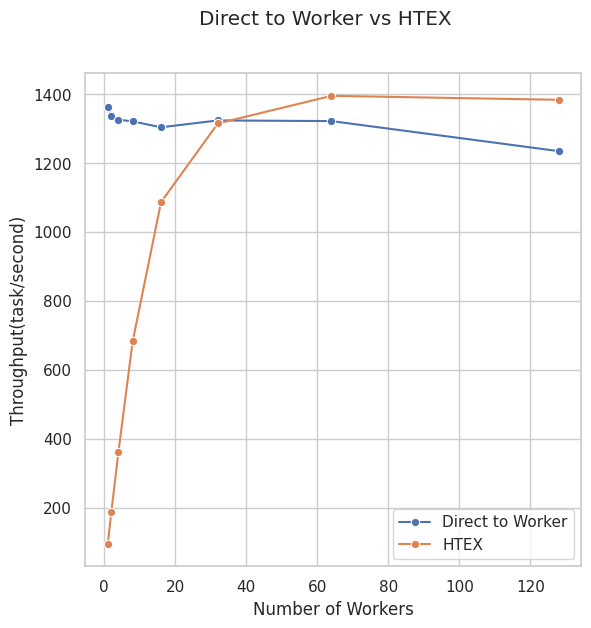

In [11]:
# direct vs htex
# workload fib(25)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.4,6.4))

direct = [1362.217867,	1336.893224,	1325.833413,	1320.774505,	1303.661746,	1323.572751,	1321.670926,	1234.510262]
htex = [94.78235409,	187.5222059,	361.6370001,	682.3828663,	1086.529425,	1314.838884,	1394.915254,	1383.433669]
nworkers = [1, 2, 4, 8, 16, 32, 64, 128]

df = pd.DataFrame({"Throughput(Direct)": direct, "Throughput(HTEX)": htex, "Number of Workers": nworkers})

sns.lineplot(df, x="Number of Workers", y="Throughput(Direct)", marker="o", label="Direct to Worker", ax=ax)
sns.lineplot(df, x="Number of Workers", y="Throughput(HTEX)", marker="o", label="HTEX", ax=ax)
ax.set_ylabel("Throughput(task/second)")
f.suptitle("Direct to Worker vs HTEX")

f.savefig(SAVE_DIR + "direct_vs_htex.png")

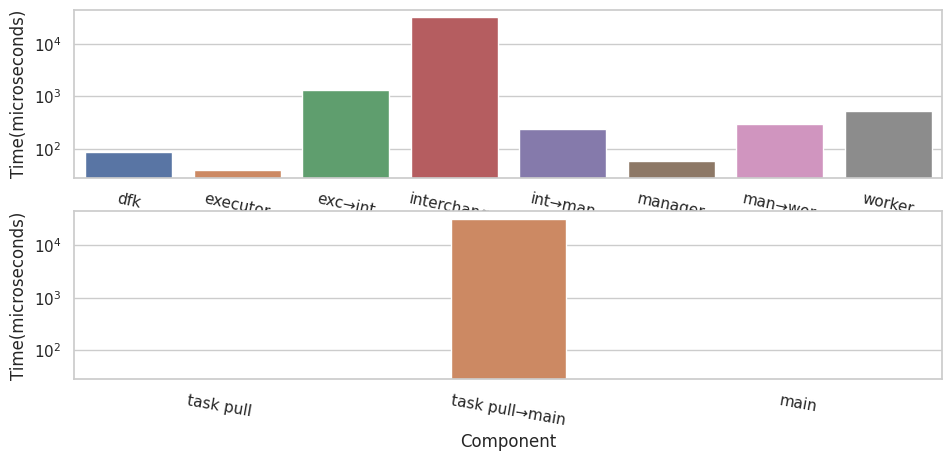

In [12]:
# unified tagging
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharey=True)
def tagging(ax):
    # workerload fib(25) 144 workers 1 manager htex
    time = [8.477394580841065e-05, 3.8863635063171386e-05, 0.001304353952407837, 0.03159386081695557, 0.0002338757038116455, 5.925240516662598e-05, 0.00029827773571014407, 0.0005129362344741821]
    time = [t * 1000000 for t in time]
    component = ["dfk", "executor", "exc→int", "interchange", "int→man", "manager", "man→wor", "worker"]
    df = pd.DataFrame({"Time(microseconds)": time, "Component": component})
    sns.barplot(data=df, x="Component", y="Time(microseconds)", ax=ax)
    ax.set_yscale("log")
    ax.tick_params(axis='x', rotation=-12)

def interchange_tagging(ax):
    # workload fib(25) 144 workers 1 manager htex
    time = [-3.887295722961426e-06, 0.031579251980781556, 1.0721540451049805e-05]
    time = [t * 1000000 for t in time]
    component = ["task pull", "task pull→main", "main"]

    df = pd.DataFrame({"Time(microseconds)": time, "Component": component})
    sns.barplot(data=df, x="Component", y="Time(microseconds)", ax=ax, width=.4)
    ax.tick_params(axis='x', rotation=-10)
    ax.set_yscale("log")

tagging(ax1)
interchange_tagging(ax2)
f.savefig(SAVE_DIR + "tagging.png", dpi=500)

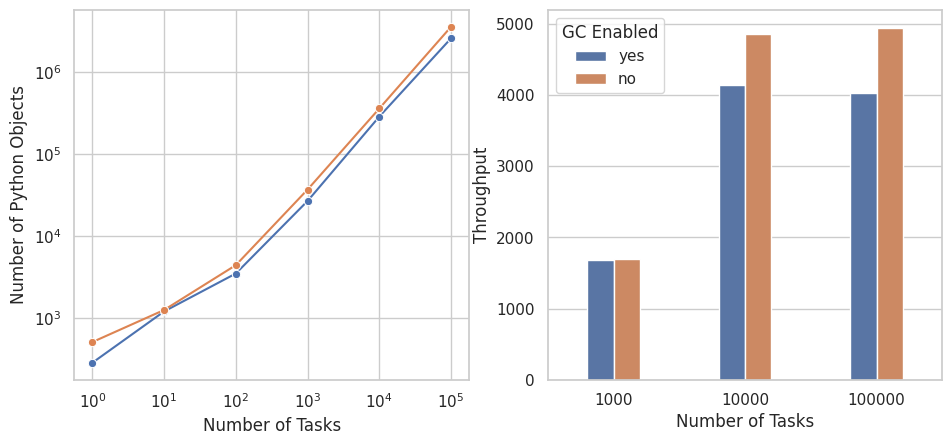

In [13]:
# memory footprint
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
def cdfk_vs_pdfk_objcount(ax):
    numtasks = [1, 10, 100, 1000, 10000, 100000]
    cdfk = [281.0, 1191.5, 3465.3, 26692.4, 287134.6, 2600550.7]
    pdfk = [503.0, 1241.0, 4386.1, 36811.9, 360629.2, 3600768.6]
    df = pd.DataFrame({"Number of Tasks": numtasks, "C DFK": cdfk, "Python DFK": pdfk})
    sns.lineplot(data=df, x="Number of Tasks", y="C DFK", marker="o", ax=ax)
    sns.lineplot(data=df, x="Number of Tasks", y="Python DFK", marker="o", ax=ax)
    ax.set_ylabel("Number of Python Objects")
    ax.set_yscale("log")
    ax.set_xscale("log")

def gc_vs_nogc_throughput(ax):
    numtasks = [1000, 10000, 100000] + [1000, 10000, 100000]
    gc = [1000 / 0.5928019762039185, 10000 / 2.4107550144195558, 100000 / 24.805594515800475]
    nogc = [1000 / 0.5894630193710327, 10000 / 2.0575541734695433, 100000 / 20.18178346157074]
    havegc = 3 * ["yes"] + 3 * ["no"]
    df = pd.DataFrame({"Number of Tasks": numtasks, "Throughput": gc + nogc, "GC Enabled": havegc})
    sns.barplot(df, x="Number of Tasks", y="Throughput", hue="GC Enabled", width=.4,ax=ax)


cdfk_vs_pdfk_objcount(ax1)
gc_vs_nogc_throughput(ax2)
f.savefig(SAVE_DIR + "memory_footprint.png")

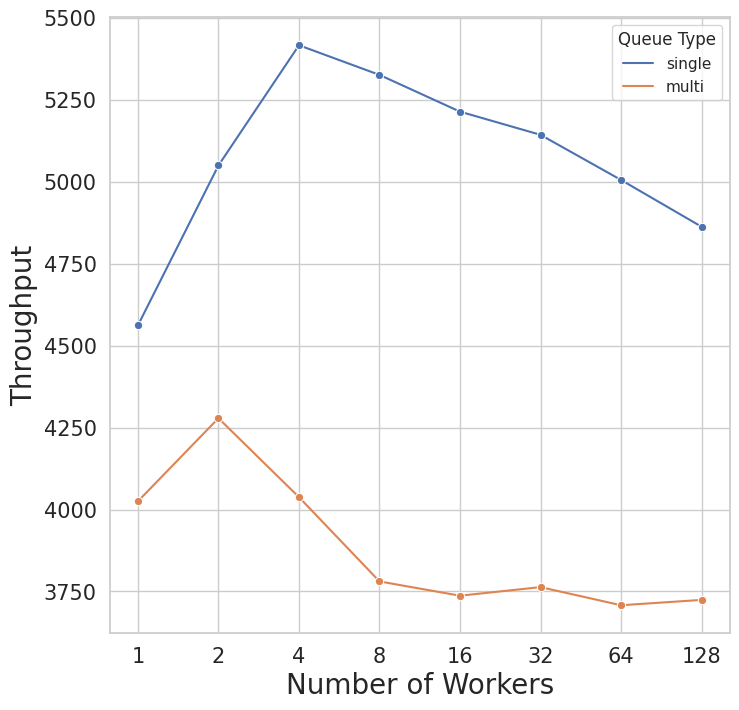

In [14]:
# single-queue vs multi-queue
f, ax = plt.subplots(nrows=1, ncols=1, figsize=singlechart_figsize)
nworkers = [1, 2, 4, 8, 16, 32, 64, 128]
mqruntime = [2.484412097930908, 2.337325692176819, 2.476684904098511, 2.6450060844421386, 2.6758565664291383, 2.657198667526245, 2.6968280553817747, 2.6850218296051027]
sqruntime = [2.1922109127044678, 1.9805155754089356, 1.846487283706665, 1.8778392553329468, 1.9182080030441284, 1.9445616722106933, 1.9980420112609862, 2.0566566228866576]
mqthroughput = [10000 / i for i in mqruntime]
sqthroughput = [10000 / i for i in sqruntime]
queuetype = 8 * ["single"] + 8 * ["multi"]
df = pd.DataFrame({"Number of Workers": nworkers + nworkers, "Throughput": sqthroughput + mqthroughput, "Queue Type": queuetype})
sns.lineplot(df, x="Number of Workers", y="Throughput", hue="Queue Type", marker="o", ax=ax)
ax.set_xscale(LogScale(1, base=2))
ax.set_xticks(nworkers)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

change_font(ax, None, fontsize=20)
f.savefig(SAVE_DIR + "sqvmq_throughput.png")

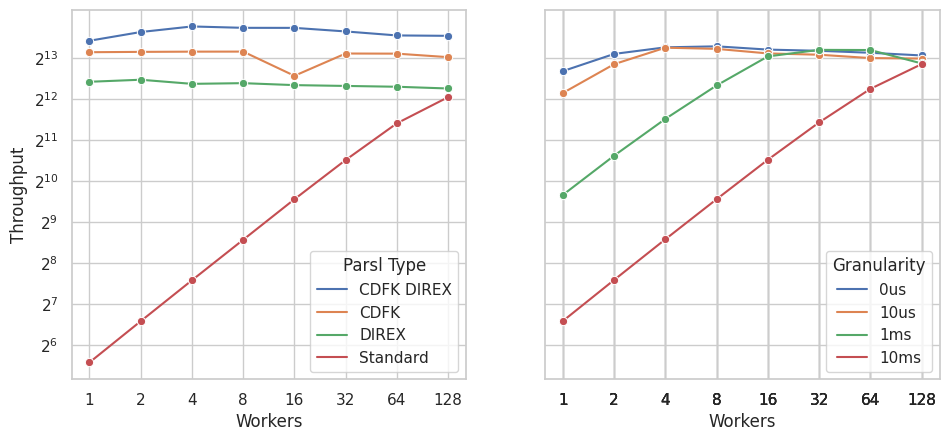

In [15]:
# cdfkdirex comparrison
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize, sharey=True)
def cdfkdirex_vs_all(ax):
    cdfk_direx_runtime = [0.9177794694900513,0.7923081636428833,0.7211169958114624,0.7381311416625976,0.7386274337768555,0.7844016313552856,0.8391645669937133,0.8448013305664063]
    cdfk_runtime = [1.113578200340271, 1.1074100494384767, 1.103058385848999, 1.1020861387252807, 1.6579477310180664, 1.138422155380249, 1.140928530693054, 1.210385251045227]
    direx_runtime = [1.8335903406143188, 1.7716833353042603, 1.8989869435628255, 1.876910098393758, 1.9401285171508789, 1.967039171854655, 1.9942612012227376, 2.0535037597020467]
    htex_runtime = [208.69511485099792, 104.06894159317017, 52.18400287628174, 26.351411819458008, 13.301186561584473, 6.86055326461792, 3.694573163986206, 2.37636137008667]
    nworkers=[1, 2, 4, 8, 16, 32, 64, 128]
    cdfk_direx_throughput = [10000 / t for t in cdfk_direx_runtime]
    cdfk_throughput = [10000 / t for t in cdfk_runtime]
    direx_throughput = [10000 / t for t in direx_runtime]
    htex_throughput = [10000 / t for t in htex_runtime]

    df = pd.DataFrame({"Throughput": cdfk_direx_throughput + cdfk_throughput + direx_throughput + htex_throughput, "Workers": 4 * nworkers, "Parsl Type": 8 * ["CDFK DIREX"] + 8 *["CDFK"] + 8 * ["DIREX"] + 8 *["Standard"]})
    sns.lineplot(data=df, x="Workers", y="Throughput", hue="Parsl Type", marker="o", ax=ax)
    ax.set_xscale(LogScale(1, base=2))
    ax.set_yscale(LogScale(2, base=2))
    ax.set_xticks(nworkers, nworkers, weight="normal")
    ax.set_yticks([64, 128, 256, 512, 1024, 2048, 4096, 8192])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

def granularity_cdfkdirex(ax):
    cdfkdirex_0us = [1.5317886590957641,1.1461533546447753,1.0257321119308471,1.0085374593734742,1.065446376800537,1.0874726533889771,1.1242356300354004,1.1761406898498534]
    #cdfkdirex_1us = [1.357242226600647,1.0301915645599364,1.0291496753692626,1.0768460035324097,1.0442428827285766,1.0092048645019531,1.093170166015625,1.1154373407363891]
    cdfkdirex_10us = [2.2140042781829834,1.3623889207839965,1.0318618059158324,1.0525174617767334,1.1366793155670165,1.1619214296340943,1.2294798612594604,1.2394426822662354]
    #cdfkdirex_100us = [1.7466087818145752,1.158806276321411,1.0471296072006226,1.0524781227111817,1.0551241874694823,0.9883117914199829,1.0413472652435303,1.128321933746338]
    cdfkdirex_1000us = [12.359384560585022,6.375921702384948,3.42776300907135,1.9504756450653076,1.1954525709152222,1.0704438447952271,1.073413610458374,1.3453425407409667]
    cdfkdirex_10000us = [103.71087141036988,51.8652984380722,26.116928601264952,13.285402727127074,6.830551505088806,3.6402657985687257,2.0676778078079225,1.361882781982422]

    cdfkdirex_tot = cdfkdirex_0us + cdfkdirex_10us + cdfkdirex_1000us + cdfkdirex_10000us

    cdfkdirex_throughput = [10000 / t for t in cdfkdirex_tot]
    cdfkdirex_gran = 8*["0us"] + 8*["10us"] + 8*["1ms"] + 8*["10ms"]
    nworkers=4*[1,2,4,8,16,32,64,128]
    df = pd.DataFrame({THROUGHPUT_YLABEL: cdfkdirex_throughput, "Workers": nworkers, "Granularity": cdfkdirex_gran})
    sns.lineplot(data=df, x="Workers", y=THROUGHPUT_YLABEL, hue="Granularity", marker="o", ax=ax)

    ax.set_xscale(LogScale(1, base=2))
    ax.set_yscale(LogScale(2, base=2))
    ax.set_xticks(nworkers, nworkers, weight="normal")
    ax.set_yticks([128, 256, 512, 1024, 2048, 4096, 8192])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

cdfkdirex_vs_all(ax1)
granularity_cdfkdirex(ax2)
plt.setp(ax2.get_yticklabels(), visible=False)
ax1.set_yscale(LogScale(2, base=2))
ax1.set_yticks([64, 128, 256, 512, 1024, 2048, 4096, 8192])
f.savefig(SAVE_DIR + "cdfkdirex_cmp.png")

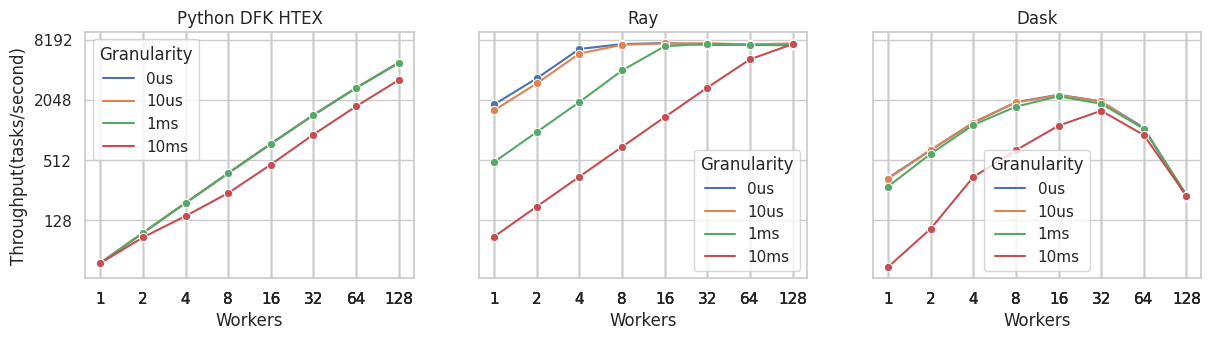

In [16]:
# granularity comparrison
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=wholecolumn_figsize, sharey=True)
def granularity_pdfkhtex(ax):
    pdfkhtex_0us = [208.56073191165925,104.15164544582368,52.234071254730225,26.408666682243346,13.421913957595825,6.915656852722168, 3.7138410568237306, 2.0781458139419557]
    pdfkhtex_10us = [207.95815584659576,104.0417453289032,52.20868666172028,26.371598625183104,13.435020303726196,6.920794987678528,3.722451400756836,2.08894145488739]
    pdfkhtex_1000us = [208.93325073719024,104.5724549293518,52.44926130771637,26.460202550888063,13.460071396827697,6.91746289730072,3.7199410438537597,2.085188293457031]
    pdfkhtex_10000us = [209.156539273262,115.5913720369339,70.67908318042755,41.716539072990415,21.653223848342897,10.853071260452271,5.676747894287109,3.1015659093856813]
    pdfkhtex_tot = pdfkhtex_0us + pdfkhtex_10us + pdfkhtex_1000us + pdfkhtex_10000us
    pdfkhtex_throughput = [10000 / t for t in pdfkhtex_tot]
    pdfkhtex_gran = 8*["0us"] + 8*["10us"] + 8*["1ms"] + 8*["10ms"]
    nworkers=4*[1,2,4,8,16,32,64,128]
    df = pd.DataFrame({THROUGHPUT_YLABEL: pdfkhtex_throughput, "Workers": nworkers, "Granularity": pdfkhtex_gran})
    sns.lineplot(data=df, x="Workers", y=THROUGHPUT_YLABEL, hue="Granularity", marker="o", ax=ax)

    ax.set_xscale(LogScale(1, base=2))
    ax.set_yscale(LogScale(2, base=2))
    ax.set_xticks(nworkers)
    ax.set_yticks([128, 256, 512, 1024, 2048, 4096, 8192])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_title("Python DFK HTEX")

    # change_font(ax, None, fontsize=20)

def granularity_dask(ax):
    dask_0us = [29.53185087770398,15.480700585691375,8.258053458703216,5.152660356592969,4.346021985498373,5.064179336500819,9.296009012300056,45.72336811890127]
    dask_10us = [30.02078281409922,15.532390564802336,8.227846888205386,5.188785553703201,4.394784313900163,5.048121868399903,9.543887097397237,43.47842378669884]
    dask_1000us = [35.87134775070008,16.898433726397343,8.69462291020027,5.710084404796362,4.501105657705921,5.345659045997309,9.482958284195046,43.470774537502436]
    dask_10000us = [228.6374506703054,94.61450708560297,28.851210198696936,15.580414767999901,8.84547327249893,6.271609366402845,10.986490468599367,44.284311394297404]
    dask_tot = dask_0us + dask_10us + dask_1000us + dask_10000us
    dask_throughput = [10000 / t for t in dask_tot]
    dask_gran = 8*["0us"] + 8*["10us"] + 8*["1ms"] + 8*["10ms"]
    nworkers=4*[1,2,4,8,16,32,64,128]
    df = pd.DataFrame({THROUGHPUT_YLABEL: dask_throughput, "Workers": nworkers, "Granularity": dask_gran})
    sns.lineplot(data=df, x="Workers", y=THROUGHPUT_YLABEL, hue="Granularity", marker="o", ax=ax)

    ax.set_xscale(LogScale(1, base=2))
    ax.set_yscale(LogScale(2, base=2))
    ax.set_xticks(nworkers)
    # ax.set_yticks([128, 256, 512, 1024, 2048, 4096, 8192])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_title("Dask")

    # change_font(ax, None, fontsize=20)

def granularity_ray(ax):
    ray_0us = [5.430666340980679,2.9773381864652038,1.5158570311032236,1.3555972293019294,1.322595653682947,1.3797629032284022,1.3706705102697014,1.375115935690701]
    ray_10us = [6.220524882432073,3.3465378382243216,1.6843417956493796,1.3774099230766297,1.3353450790047645,1.3294007359072566,1.364827434718609,1.334254747722298]
    ray_1000us = [20.40687863016501,10.239490812271834,5.1341957651078705,2.4855086233466865,1.4247257123701274,1.344102220516652,1.380251538939774,1.3954690925776958]
    ray_10000us = [113.53895511645824,56.83142975699157,28.581554535962642,14.401022431068123,7.273174765426665,3.6846698691137134,1.9250256136991084,1.3559844645671546]

    ray_tot = ray_0us + ray_10us + ray_1000us + ray_10000us
    ray_throughput = [10000 / t for t in ray_tot]
    ray_gran = 8*["0us"] + 8*["10us"] + 8*["1ms"] + 8*["10ms"]
    nworkers=4*[1,2,4,8,16,32,64,128]
    df = pd.DataFrame({THROUGHPUT_YLABEL: ray_throughput, "Workers": nworkers, "Granularity": ray_gran})
    sns.lineplot(data=df, x="Workers", y=THROUGHPUT_YLABEL, hue="Granularity", marker="o", ax=ax)

    ax.set_xscale(LogScale(1, base=2))
    ax.set_yscale(LogScale(2, base=2))
    ax.set_xticks(nworkers)
    ax.set_yticks([128, 256, 512, 1024, 2048, 4096, 8192])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_title("Ray")

    # change_font(ax, None, fontsize=20)

granularity_pdfkhtex(ax1)
granularity_ray(ax2)
granularity_dask(ax3)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
f.savefig(SAVE_DIR + "granularity_cmp.png")

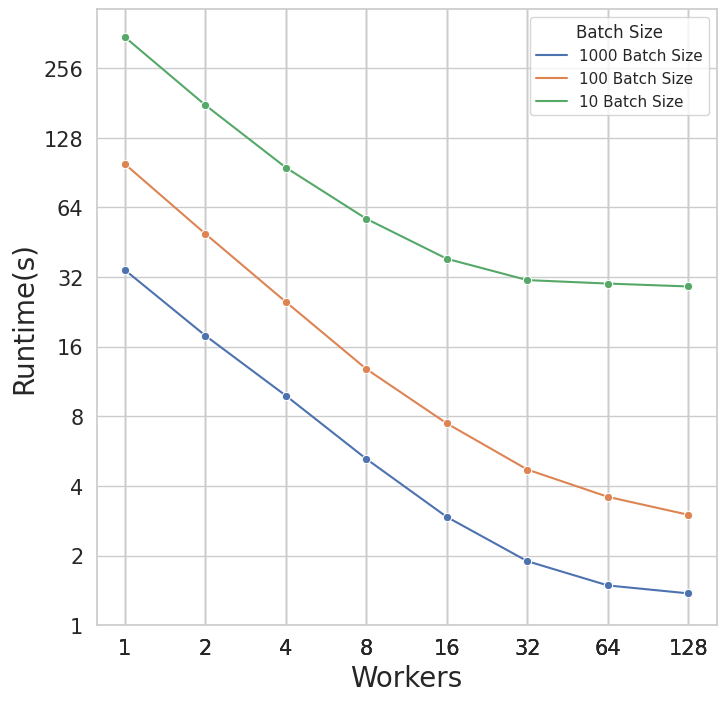

In [18]:
# smiknn cdfk
sns.color_palette("hls", 8)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=singlechart_figsize)
runtime1kb = [1.3731940031051635,1.4861858367919922,1.8912609577178956,2.9374542951583864,5.234819602966309,9.829994821548462,17.870266795158386, 34.35889132022858]
runtime1hb = [3.0020461082458496,3.589237642288208,4.709066677093506,7.452650642395019,12.811346077919007,24.993502283096312,49.22772607803345, 98.6276061296463]
runtime10b = [29.144734621047974,29.995630931854247,31.044559264183043,38.37913780212402,57.140538811683655,95.18248608112336,177.26502811908722, 348.85890247821806]
runtime = runtime1kb + runtime1hb + runtime10b
nworkers=3*[128,64,32,16,8,4,2,1]
bsize = 8 *["1000 Batch Size"] + 8 * ["100 Batch Size"] + 8 * ["10 Batch Size"]
df = pd.DataFrame({"Runtime(s)": runtime, "Workers": nworkers, "Batch Size": bsize})
sns.lineplot(data=df, x="Workers", y="Runtime(s)", hue="Batch Size", marker="o", ax=ax)

ax.set_xscale(LogScale(1, base=2))
ax.set_yscale(LogScale(2, base=2))
ax.set_xticks(nworkers)
ax.set_yticks([1, 2, 4, 8, 16, 32, 64, 128, 256])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_legend().set_title("Batch Size")
change_font(ax, None, fontsize=20)
f.savefig(SAVE_DIR + "smiknn_cdfk.png", dpi=300)

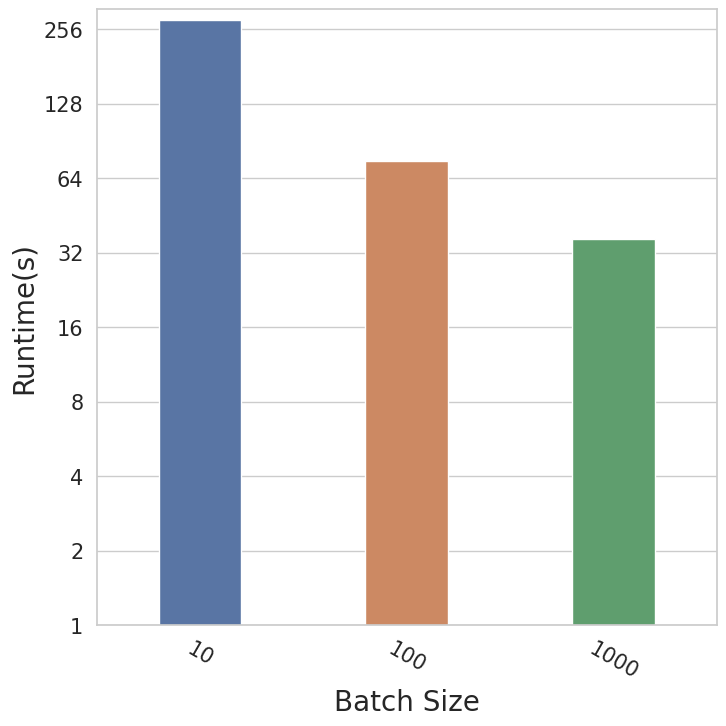

In [19]:
# smiknn serial
sns.color_palette("hls", 8)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=singlechart_figsize)
blocks = [10, 100, 1000]
runtime = [278.50316815376283,75.43989520072937, 36.34670898914337]
df = pd.DataFrame({"Batch Size": blocks, "Runtime(s)": runtime})
sns.barplot(df, x="Batch Size", y="Runtime(s)", ax=ax, width=.4, errorbar=None)
ax.tick_params(axis='x', rotation=-30)
ax.set_yscale(LogScale(2, base=2))
ax.set_yticks([1, 2, 4, 8, 16, 32, 64, 128, 256])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

change_font(ax, None, fontsize=20)
f.savefig(SAVE_DIR + "smiknn_serial.png", dpi=500)

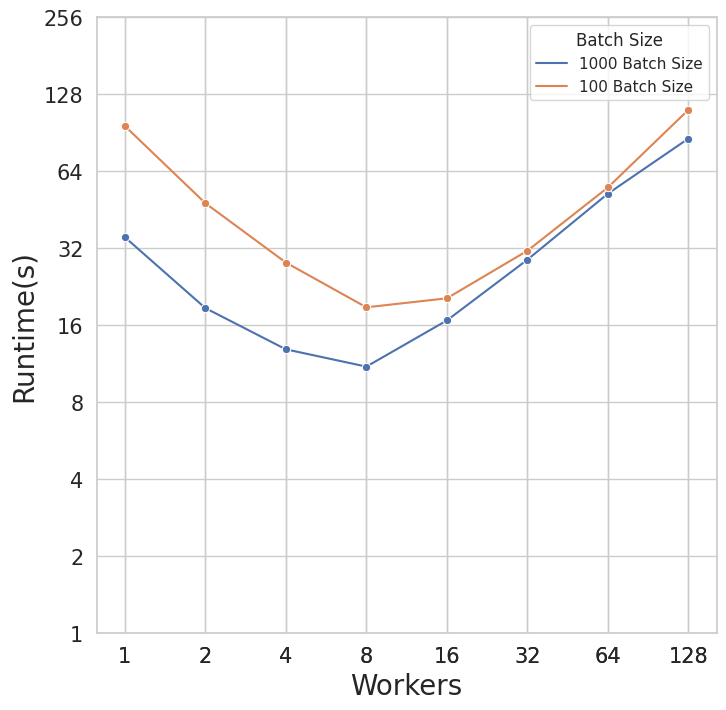

In [20]:
# smiknn stdparsl
sns.color_palette("hls", 8)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=singlechart_figsize)
runtime1kb = [85.91678261756897, 52.32095193862915, 28.867486000061035, 16.70747947692871, 11.025074243545532, 12.883922815322876, 18.67558479309082, 35.36358094215393]
runtime1hb = [111.31407427787781, 55.32581114768982, 31.289098739624023, 20.393805742263794, 18.803539276123047, 28.136523723602295, 48.0152530670166, 96.20473098754883]
runtime = runtime1kb + runtime1hb
nworkers = 2*[128,64,32,16,8,4,2,1]
bsize = 8 * ["1000 Batch Size"] + 8 * ["100 Batch Size"]

df = pd.DataFrame({"Runtime(s)": runtime, "Batch Size": bsize, "Workers": nworkers})
sns.lineplot(data=df, x="Workers", y="Runtime(s)", hue="Batch Size", marker="o", ax=ax)

ax.set_xscale(LogScale(1, base=2))
ax.set_yscale(LogScale(2, base=2))
ax.set_xticks(nworkers)
ax.set_yticks([1, 2, 4, 8, 16, 32, 64, 128, 256])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_legend().set_title("Batch Size")
change_font(ax, None, fontsize=20)
f.savefig(SAVE_DIR + "smiknn_stdparsl.png", dpi=300)

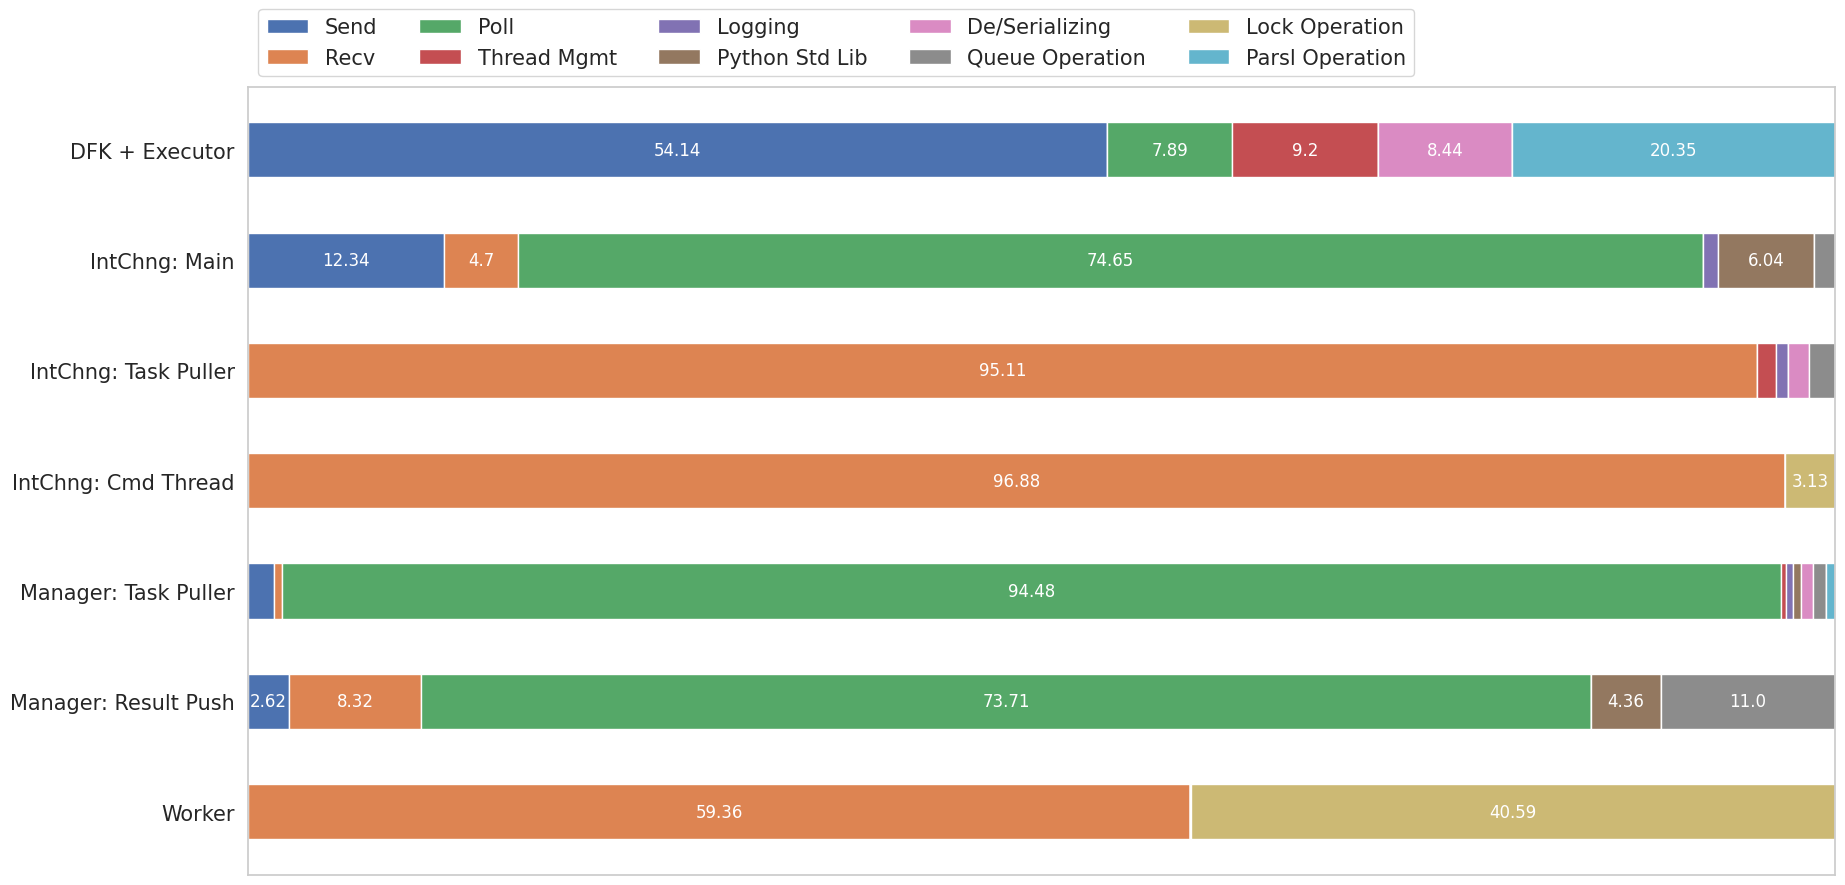

In [21]:
# parsl profiled
sns.color_palette("hls", 8)

def normalize(array):
    s = sum(array)
    return [(a / s) * 100 for a in array]

labels = ["Send",
          "Recv",
          "Poll",
          "Thread Mgmt",
          "Logging",
          "Python Std Lib",
          "De/Serializing",
          "Queue Operation",
          "Lock Operation",
          "Parsl Operation",
]

data = {
        "DFK + Executor": normalize([(0.44525168655941877 + 0.07109496626881162), 0, 0.07524649714582252, 0.08770108977685522, 0, 0, (0.043072132848988066+0.037363777893098075), 0, 0, (0.07317073170731707+0.09548521017125064+0.02542812662169175)]),
        "IntChng: Main": normalize([0.385+0.046, 0.164, 2.609, 0, 0.033, 0.091+0.054+0.035+0.031, 0, 0.047, 0, 0]),
        "IntChng: Task Puller": normalize([0, 3.844, 0, 0.007+0.008+0.033, 0.012+0.018, 0, 0.054, 0.059+0.007, 0, 0]),
        "IntChng: Cmd Thread": normalize([0, 2.476, 0, 0, 0, 0, 0, 0, 0.080, 0]),
        "Manager: Task Puller": normalize([0.028, 0.008, 1.591, 0.005, 0.007, 0.005+0.004, 0.012, 0.014, 0, 0.010]),
        "Manager: Result Push": normalize([0.039, 0.090+0.034, 1.099, 0, 0, 0.022+0.043, 0, 0.054+0.042+0.046+0.022, 0, 0]),
        "Worker": normalize([0, 0.586, 0, 0, 0, 0.0001, 0, 0.0003, 0.4007, 0.0002])
}

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20.48, 10.24))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5, label=colname) # , color=color)
        r, g, b, _ = color
        text_color = 'white' # if r * g * b < 0.5 else 'darkgrey'
        # ax.bar_label(rects, label_type='center', color=text_color)

    threshold = 2
    for c in ax.containers:
        # Filter the labels
        labels = [math.ceil(v*100)/100 if v > threshold else "" for v in c.datavalues]
        ax.bar_label(c, labels=labels, label_type="center", color="white")

    fontsize = 15
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)

    xlabel = ax.xaxis.get_label()
    ylabel = ax.yaxis.get_label()

    xlabel.set_fontsize(fontsize)
    ylabel.set_fontsize(fontsize)
    ax.legend(ncols=len(category_names)//2, bbox_to_anchor=(0, 1), loc='lower left', fontsize=fontsize)

    return fig, ax

f, ax = survey(data, labels)
f.savefig(SAVE_DIR + "parsl_profiled.png")

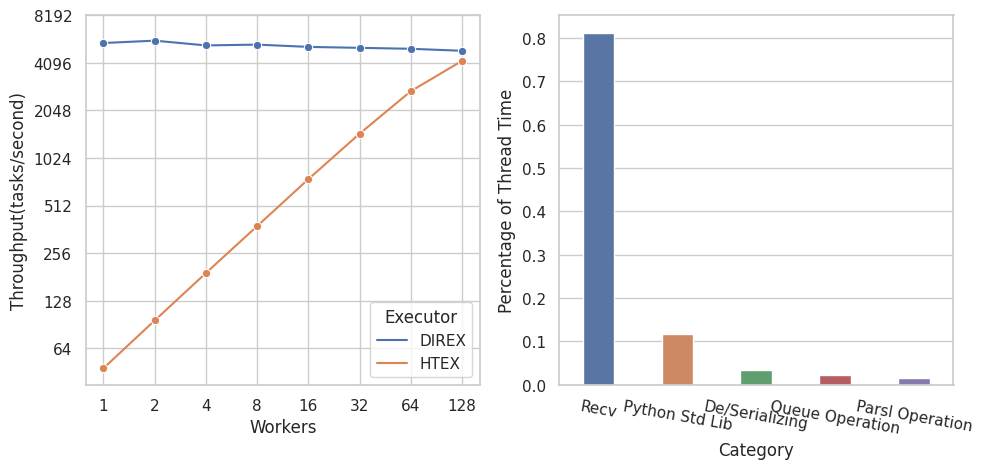

In [22]:
# direx
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
def nologging_direct_vs_htex(ax):
    druntime = [1.8335903406143188, 1.7716833353042603, 1.8989869435628255, 1.876910098393758, 1.9401285171508789, 1.967039171854655, 1.9942612012227376, 2.0535037597020467]
    hruntime = [208.69511485099792, 104.06894159317017, 52.18400287628174, 26.351411819458008, 13.301186561584473, 6.86055326461792, 3.694573163986206, 2.37636137008667]
    nworkers=[1, 2, 4, 8, 16, 32, 64, 128]
    dthroughput = [10000 / t for t in druntime]
    hthroughput = [10000 / t for t in hruntime]
    df = pd.DataFrame({THROUGHPUT_YLABEL: dthroughput + hthroughput, "Workers": nworkers + nworkers, "Executor": 8 * ["DIREX"] + 8 *["HTEX"]})
    sns.lineplot(data=df, x="Workers", y=THROUGHPUT_YLABEL, hue="Executor", marker="o", ax=ax)
    ax.set_xscale(LogScale(1, base=2))
    ax.set_yscale(LogScale(2, base=2))
    ax.set_xticks(nworkers)
    ax.set_yticks([64, 128, 256, 512, 1024, 2048, 4096, 8192])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    # f.suptitle("Direct to Worker vs HTEX")
    # change_font(ax, "Direct to Worker vs HTEX", fontsize=15)
    # f.savefig(SAVE_DIR + "nolog_direct_vs_htex.png")

def direx_worker_profiled(ax):
    thread_time = [1.477 + 0.024, 0.153 + 0.037 + 0.024, 0.035 + 0.026, 0.022 + 0.021, 0.029]
    tot = sum(thread_time)
    threadtime_percent = [t / tot for t in thread_time]
    label = ["Recv", "Python Std Lib", "De/Serializing", "Queue Operation", "Parsl Operation"]

    df = pd.DataFrame({"Percentage of Thread Time": threadtime_percent, "Category": label})
    sns.barplot(df, x="Category", y="Percentage of Thread Time", ax=ax, width=.4)
    ax.tick_params(axis='x', rotation=-10)

    # change_font(ax, None, fontsize=15)
    # f.savefig(SAVE_DIR + "direx_worker_profiled.png") # , dpi=300)

nologging_direct_vs_htex(ax1)
direx_worker_profiled(ax2)
f.savefig(SAVE_DIR + "direx.png")

In [ ]:
# single-queue multi-queue profiled
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize, sharey=True)
    def mq_profiled(ax):
        thread_time = [96.17, 1.50, 0.63, .14]
        tot = sum(thread_time)
        threadtime_percent = [t / tot for t in thread_time]
        label = ["Recv", "Python Std Lib", "De/Serializing", "Queue Operation"]

        df = pd.DataFrame({"Percentage of Thread Time": threadtime_percent, "Category": label})
        sns.barplot(df, x="Category", y="Percentage of Thread Time", ax=ax, width=.4)
        ax.tick_params(axis='x', rotation=-10)
        #ax.set_title("Multi-Queue Worker Profiled")
        ax.set_ylabel("")
        # change_font(ax, None, fontsize=20)
        # f.savefig(SAVE_DIR + "worker_mq.png", dpi=500)

    def sq_profiled(ax):
        thread_time = [84.87, 10.19, 1.73, 0.8, 0.37]
        tot = sum(thread_time)
        threadtime_percent = [t / tot for t in thread_time]
        label = ["Lock Operation", "Recv", "Python Std Lib", "De/Serializing", "Queue Operation"]

        df = pd.DataFrame({"Percentage of Thread Time": threadtime_percent, "Category": label})
        sns.barplot(df, x="Category", y="Percentage of Thread Time", ax=ax, width=.4)
        ax.tick_params(axis='x', rotation=-10)
        #ax.set_title("Single Queue Worker Profiled")
        # change_font(ax, None, fontsize=20)
        # f.savefig(SAVE_DIR + "worker_sq.png", dpi=500)

    sq_profiled(ax1)
    mq_profiled(ax2)
    plt.setp(ax2.get_yticklabels(), visible=False)
    f.savefig(SAVE_DIR + "sqmq_profiled.png")